dataset_link : https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers?select=Churn_Modelling.csv

#### Data preprocessing

In [1]:
# installing necessary dependencies

import zipfile
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#! extracting the zip file 

with zipfile.ZipFile('churn_data.zip','r') as file:
    file.extractall()

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Data Exploration 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isna().values.sum()

0

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
cat_col = list(df.select_dtypes(include='object'))
cat_col

['Surname', 'Geography', 'Gender']

In [8]:

num_col = list(df.select_dtypes(include=['int','float']))
num_col

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

#### Preprocessing part 2 exploring the data 


In [28]:
# ! exploring the categorical columns 
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [29]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [30]:
df['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [15]:
df.groupby(['Geography']).mean()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,,,
France,5025.228560,1.569065e+07,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,5000.278996,1.569056e+07,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,4950.667743,1.569192e+07,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


### Germany is standing out in terms of Balance

In [16]:

df.groupby(['Gender']).mean()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,,,
Female,4942.929562,1.569115e+07,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,5048.427891,1.569077e+07,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


#### Encoding the categorical columns


In [12]:
df = df.drop(columns=['Surname'])

In [13]:
# pandas encoding 
# one hot encoding 

df = pd.get_dummies(data=df,drop_first=True)

In [38]:
df.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


#### Performing data visualization 

##### 1.Countplot

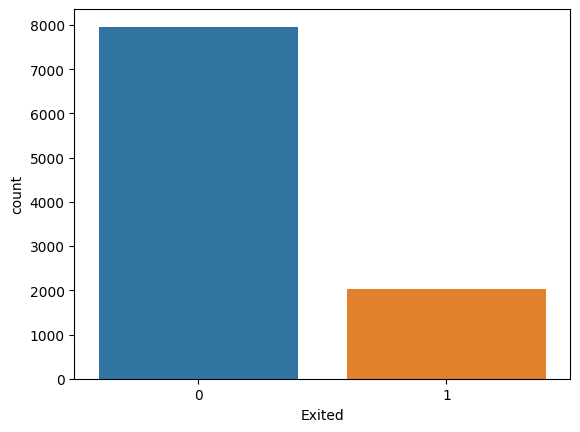

In [42]:
# sns.countplot(df['Exited'])
# # plt.plot
sns.countplot(x = df['Exited'])
plt.show()

In [43]:

len(df[(df['Exited']==0)])

7963

In [45]:

exited_custoemr = len(df[(df['Exited']==1)])
exited_custoemr

2037

In [16]:
corr_df = df.corr()
corr_df

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571,-0.000044,-0.009905,0.018196
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248,-0.003097,0.007800,-0.002641
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112


In [14]:
df_2 = df.drop(columns='Exited')

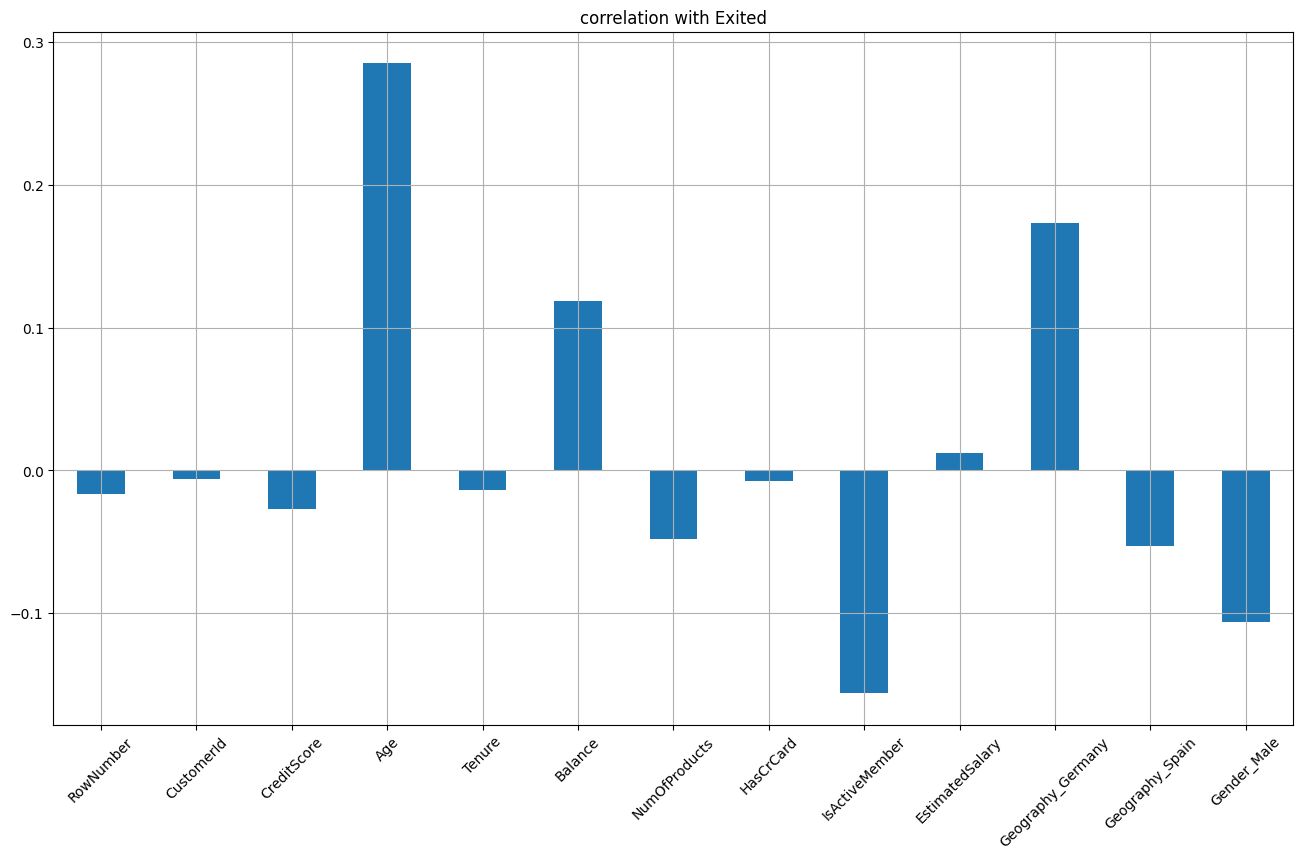

In [15]:
df_2.corrwith(df['Exited']).plot.bar(
    figsize = (16,9), title='correlation with Exited' , rot=45, grid = True
)
plt.show()

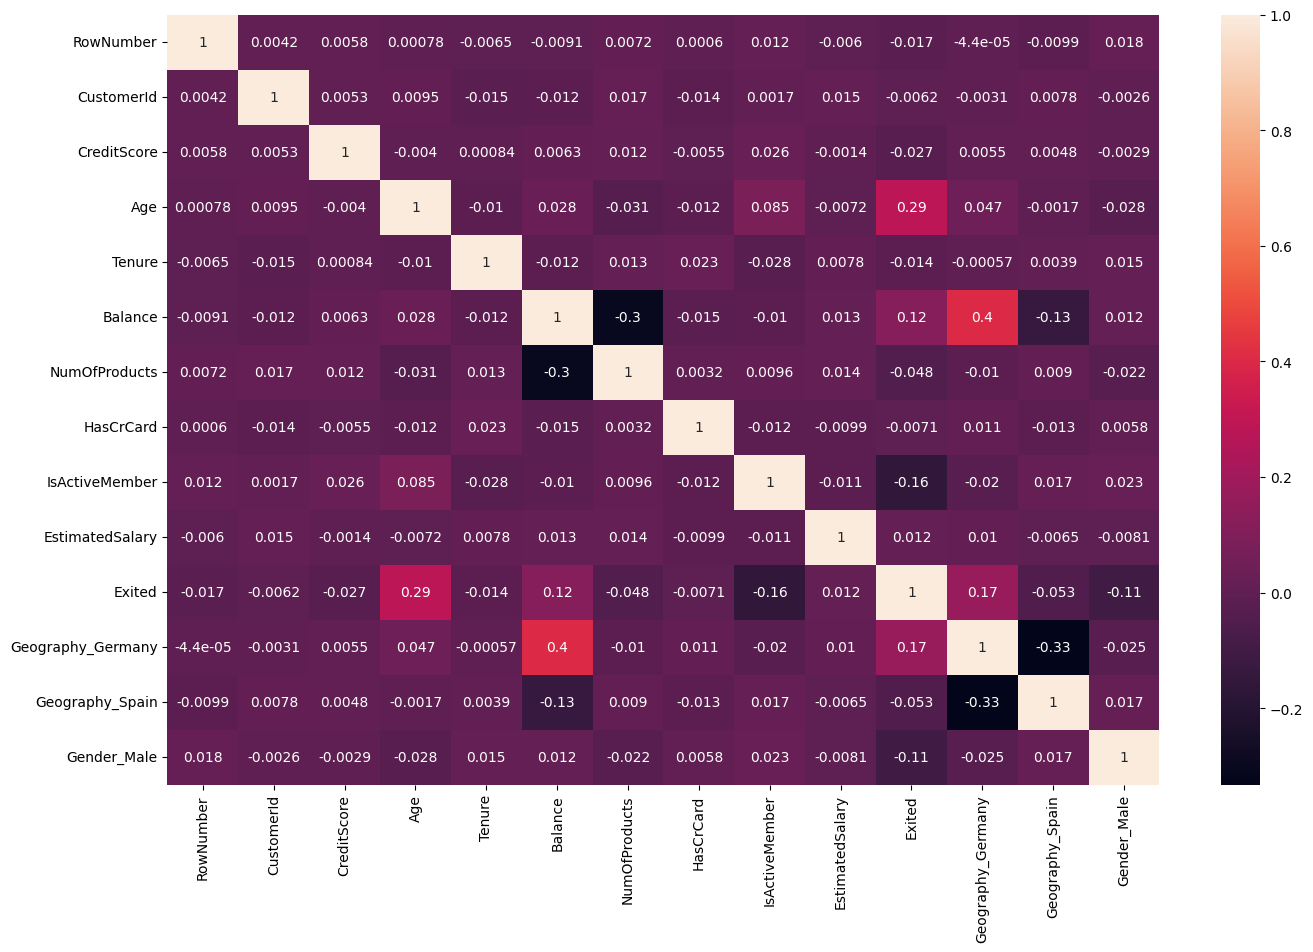

In [17]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_df,annot=True)
plt.show()

In [20]:
# row number , customoerid , 
df = df.drop(columns=['CustomerId'])

In [22]:
df =df.drop(columns=['RowNumber'])

## Splitting the dataset

In [23]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [25]:
# dataset containg dependent variables except target variable 
# Matrix of features 
X = df.drop(['Exited'], axis=1)


In [26]:
# selecting the target variable 
Y = df['Exited']

In [27]:
# importing necessary libraries for machine learning 

from sklearn.model_selection import train_test_split


In [28]:
X_train ,X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [30]:
# checking the shapes after the split
X_train.shape

(8000, 11)

In [31]:
X_test.shape

(2000, 11)

## Feature Scaling 


## reference https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [32]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
X_train


array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [38]:
X_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

## Building the model 
Trying 3 differen t model and chose the one which is performing best 
1. Logistic Regression 
2. Random Forest 
3. XG_Boost classifier

### 1. Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [42]:
classifier_lr = LogisticRegression(random_state=20)

In [43]:
classifier_lr.fit(X_train,Y_train)

LogisticRegression(random_state=20)

In [44]:
y_pred =  classifier_lr.predict(X_test)

Evaluating the performance

metrics = accuracy score , confusion matrix , f1_score , precision score

In [45]:
from sklearn.metrics import accuracy_score , confusion_matrix , f1_score , precision_score , recall_score

In [46]:
acc = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
prec = precision_score(Y_test, y_pred)
rec = recall_score(Y_test, y_pred)


In [47]:
result = pd.DataFrame([['Logistic Regression',acc, f1, prec, rec]],
                      columns=['Model','Accuracy','F1','precison','Recall'])

In [48]:
result

,Model,Accuracy,F1,precison,Recall
0,Logistic Regression,0.811,0.294776,0.552448,0.201018


We can say we are getting decent accuracy but other performance metrics are not upto the mark
### Evaluating the confision matrix

In [49]:
cm = confusion_matrix(Y_test,y_pred)

In [50]:
cm

array([[1543,   64],
       [ 314,   79]], dtype=int64)

Performing the cross validation score 


### Cross validation score

In [52]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier_lr,X= X_train , y= Y_train,cv=10)

print(f"Accuracy is {accuracies.mean()*100}%")
print(f"Standard deviation of the accuracies is {accuracies.std()*100}%")

Accuracy is 80.87500000000001%
Standard deviation of the accuracies is 1.1011357772772605%


## Random Forest classification

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
classifier_rf = RandomForestClassifier(random_state = 20)
classifier_rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=20)

In [55]:
y_pred = classifier_rf.predict(X_test)

In [56]:
acc = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
prec = precision_score(Y_test, y_pred)
rec = recall_score(Y_test, y_pred)


In [57]:
model_result = pd.DataFrame([['Random Forest',acc, f1, prec, rec]],
                      columns=['Model','Accuracy','F1','precison','Recall'])

In [58]:
result.append(model_result,ignore_index=True)

,Model,Accuracy,F1,precison,Recall
0,Logistic Regression,0.8110,0.294776,0.552448,0.201018
1,Random Forest,0.8675,0.591680,0.750000,0.488550
